# <center>Python & MySQL </center> 

> Shcool Database

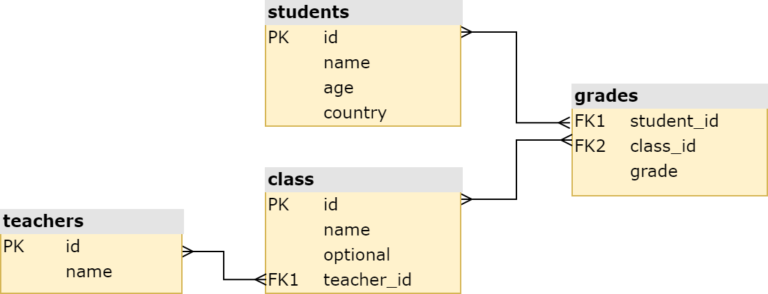

## 1. Creating Tables Using Connector/Python

In [1]:
from __future__ import print_function

import mysql.connector
from mysql.connector import errorcode

DB_NAME = 'School'
TABLES = {}

TABLES['employees'] = (
    "CREATE TABLE `students` ("
    "  `studentID` int(11) NOT NULL AUTO_INCREMENT,"
    "  `studentname` varchar(255) NOT NULL,"
    "  `Age` int  NOT NULL,"
    "  `City` varchar(16) NOT NULL,"
    "  PRIMARY KEY (`studentID`)"
    ") ENGINE=InnoDB")


TABLES['teachers'] = (
    "CREATE TABLE `teachers` ("
    "  `teacherID` int NOT NULL,"
    "  `teachername` varchar(40) NOT NULL,"
    "  PRIMARY KEY (`teacherID`)"
    ") ENGINE=InnoDB")


TABLES['class'] = (
    "CREATE TABLE `class` ("
    "`classID` int not null ,"
    "`teacherID` int ,"
    "`course_name`  varchar(255) not null,"
    "`is_optional` varchar(255) not null,"
    "primary key (`classID`),"
    "foreign key (`teacherID`) references `teachers`(teacherID)"
    ") ENGINE=InnoDB")

TABLES['grades'] = (
    "CREATE TABLE `grades` ("
    "`studentID` int not null,"
    "`classID` int not null,"
    "`grade`  int not null,"
    "foreign key (`studentID`) references `students`(`studentID`),"
    "foreign key (`classID`) references `class`(`classID`)"
    ") ENGINE=InnoDB")

In [2]:
cnx = mysql.connector.connect(user='root',password='0000')
cursor = cnx.cursor()

ProgrammingError: 1045 (28000): Access denied for user 'root'@'localhost' (using password: YES)

In [3]:
def create_database(cursor):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(DB_NAME))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)

try:
    cursor.execute("USE {}".format(DB_NAME))
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(DB_NAME))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor)
        print("Database {} created successfully.".format(DB_NAME))
        cnx.database = DB_NAME
    else:
        print(err)
        exit(1)

NameError: name 'cursor' is not defined

In [4]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

cursor.close()
cnx.close()

Creating table employees: 

NameError: name 'cursor' is not defined

## 2. Inserting Data Using Connector/Python

In [6]:
from __future__ import print_function
from datetime import date, datetime, timedelta
import mysql.connector

cnx = mysql.connector.connect(user='root', database='School',password='0000')
cursor = cnx.cursor()


add_students =( "INSERT INTO `students`" 
                "(`studentID`, `studentname`, `Age`, `City`) VALUES"          
                "(1, 'Maria Anders', 11, 'UK'),"
                "(2, 'Thomas Hardy', 12, 'USA'),"
                "(3, 'Hanna Moos', 12, 'Germany'),"
                "(4, 'Martín Sommer', 14, 'UK'),"
                "(5, 'Francisco Chang', 11, 'Germany'),"
                "(6, 'Yang Wang', 11, 'UK'),"
                "(7, 'Pedro Afonso', 11, 'UK'),"
                "(8, 'Janine Labrune', 15, 'Germany'),"
                "(9, 'Ann Devon', 22, 'USA'),"
                "(10, 'Aria Cruz', 17, 'Germany')"
                )




add_teachers =( "INSERT INTO `teachers` (`teacherID`, `teachername`) VALUES"
                "(1, 'Maria Anders'),"
                "(2, 'Thomas Hardy'),"
                "(3, 'Hanna Moos'),"
                "(4, 'Martín Sommer'),"
                "(5, 'Francisco Chang'),"
                "(6, 'Yang Wang'),"
                "(7, 'Pedro Afonso'),"
                "(8, 'Janine Labrune'),"
                "(9, 'Ann Devon'),"
                "(10, 'Aria Cruz');"
)

add_class =("INSERT INTO `class` (`classID`, `teacherID`, `course_name`, `is_optional`) VALUES"
            "(1, 5 , 'Math', 'No'),"
            "(2, 1,  'Geography' , 'No'),"
            "(3,  6,'English', 'Yes'),"
            "(4,  7,'Pythonr', 'No'),"
            "(5,  4, 'Data structures','Yes');"
)

add_grades = ( "INSERT INTO `grades` (`studentID`, `classID`, `grade`) VALUES"
                "(1, 3, 11),"
                "(2, 4, 12),"
                "(3, 4, 12),"
                "(4, 1, 14),"
                "(5, 5, 16),"
                "(6, 2, 14),"
                "(7, 1, 14),"
                "(8, 5, 15),"
                "(9, 3, 22),"
                "(10, 3, 17);"
)


# Insert new employee
cursor.execute(add_students)
emp_no = cursor.lastrowid

cursor.execute(add_teachers)
emp_no = cursor.lastrowid

cursor.execute(add_class)
emp_no = cursor.lastrowid

cursor.execute(add_grades)

# Make sure data is committed to the database
cnx.commit()

cursor.close()
cnx.close()

## 3. Querying Data Using Connector/Python

#### Q.1 selects only the DISTINCT values from the "Class" column in the "City" table

In [38]:
import mysql.connector as mysql
from getpass import getpass
user='root' 
host='127.0.0.1' 
database='school'
password=getpass()
cnx=mysql.connect(
    user=user,
    password=password,
    host=host,
    database=database
)
cursor=cnx.cursor()
cursor.execute("""
select distinct City from students;
""")
_class=cursor.fetchall()
_class

········


[('UK',), ('USA',), ('Germany',)]

#### Q.2 selects all the students from "UK"

In [39]:
cursor.execute("""
select * from students where City='UK';
""")
students=cursor.fetchall()
students

[(1, 'Maria Anders', 11, 'UK'),
 (4, 'Martín Sommer', 14, 'UK'),
 (6, 'Yang Wang', 11, 'UK'),
 (7, 'Pedro Afonso', 11, 'UK')]

#### Q.8 What is the max grade ? 

In [40]:
cursor.execute("""
select max(grade) from grades;
""")
max_grade=cursor.fetchall()
max_grade


[(22,)]

#### Q.9 What is the min grade ? 

In [41]:
cursor.execute("""
select min(grade) from grades;
""")
min_grade=cursor.fetchall()
min_grade

[(11,)]

#### Q.10 How many students in UK ? 

In [42]:
cursor.execute("""
select count(studentname) from students where City ='UK';
""")
count_student=cursor.fetchall()
count_student

[(4,)]

#### Q.11 What is the average grade ? 

In [43]:
cursor.execute("""
select avg(grade) from grades;
""")
avarage=cursor.fetchall()
avarage

[(Decimal('14.7000'),)]

#### Q.12 show students table with students grades 

In [44]:
cursor.execute("""
select students.studentID,students.studentname,students.Age,students.City,grades.studentID,grades.classID,grades.grade
from students
join grades
on students.studentID=grades.studentID;
""")

show_stud=cursor.fetchall()
show_stud

[(1, 'Maria Anders', 11, 'UK', 1, 3, 11),
 (2, 'Thomas Hardy', 12, 'USA', 2, 4, 12),
 (3, 'Hanna Moos', 12, 'Germany', 3, 4, 12),
 (4, 'Martín Sommer', 14, 'UK', 4, 1, 14),
 (5, 'Francisco Chang', 11, 'Germany', 5, 5, 16),
 (6, 'Yang Wang', 11, 'UK', 6, 2, 14),
 (7, 'Pedro Afonso', 11, 'UK', 7, 1, 14),
 (8, 'Janine Labrune', 15, 'Germany', 8, 5, 15),
 (9, 'Ann Devon', 22, 'USA', 9, 3, 22),
 (10, 'Aria Cruz', 17, 'Germany', 10, 3, 17)]

#### Q.13 How many student in each city ? 

In [45]:
cursor.execute("""
select count(studentID) from students group by City;
""")
count_student=cursor.fetchall()
count_student

[(4,), (2,), (4,)]

# <center> Thanks </center>